# Tensorflow on Iris dataset

Let's replicate the process used in the intro notebook but on the Iris dataset (as opposed to one we just made up)
    * Intro notebook does linear regression
    * Iris classification problem requires logistic regression - We will have to change our loss function to
      account for this

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from src.makevis import *
%matplotlib inline
iris = load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# One Hot Encode our Output Labels

y is an np vector of 0, 1, 2.
    * 0 -> Setosa
    * 1 - Versicolor
    * 2 -> Verginica
    
This representation of labels was fine when we used SKLearn API. However, tensorflow requires columns of 0's and 1's. This translation is known as **one hot encoding**

In [4]:
num_outputs = np.unique(y_train).shape[0]
num_train_data = y_train.shape[0]
num_test_data = y_test.shape[0]
y_hot_train = np.zeros((num_train_data, num_outputs))
y_hot_train[np.arange(num_train_data), y_train] = 1
y_hot_test = np.zeros((num_test_data, num_outputs))
y_hot_test[np.arange(num_test_data), y_test] = 1

In [5]:
y_hot_train[:10, :]

array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [6]:
y_hot_test[:10, :]

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.]])

## 1) Create Placeholders for X, y

In [7]:
num_features = X_train.shape[1]
x_tf = tf.placeholder(tf.float32, shape=[None, num_features])
y_tf = tf.placeholder(tf.float32, shape=[None, num_outputs])

## 2) Initialize input variables to hidden layer

In [8]:
# Weights. There are 3 output classes, and one weight per (feature, output class)
# combination
W = tf.Variable(tf.zeros([num_features, num_outputs]))

# Biases. This is line an intercept term in a linear regression. There is one
# per output class
b = tf.Variable(tf.zeros([num_outputs]))

# Output layer, probabilities of each class
y_hat = tf.nn.softmax(tf.matmul(x_tf, W) + b)

## 3) Specify Loss Function

In [9]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_tf * tf.log(y_hat), reduction_indices= [1]))#log loss

## 4) Create Optimizer to Minimize Loss

In [10]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

## 5) Create Session

In [11]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

## 6) Evaluate Global Variable Initializer - Training

In [12]:
for i in range(1000):
    sess.run(train_step, feed_dict= {x_tf: X_train.reshape(-1, num_features), y_tf: y_hot_train.reshape(-1, num_outputs)})
#     if i % 10 == 0:
#         print ("train step: {}".format(i))
#         print("W: {}".format(sess.run(W)))
#         print("b: {}".format(sess.run(b)))

# 7) Obtain Predictions Using Feed Dict

In [13]:
y_hat.shape

TensorShape([Dimension(None), Dimension(3)])

In [14]:
y_pred = y_hat.eval(feed_dict= {x_tf: X_test.reshape(-1, num_features), y_tf: y_hot_test.reshape(-1, num_outputs)})

In [15]:
y_pred[:5, :]

array([[  9.99991655e-01,   8.37069456e-06,   3.13612231e-27],
       [  1.98807823e-03,   9.74598408e-01,   2.34135333e-02],
       [  4.31504527e-10,   5.67407951e-05,   9.99943256e-01],
       [  2.31975433e-03,   9.94865477e-01,   2.81481491e-03],
       [  9.98477995e-01,   1.52203173e-03,   1.03111114e-18]], dtype=float32)

In [16]:
pred_labels = np.argmax(y_pred, 1)
pred_labels[:5]

array([0, 1, 2, 1, 0])

In [17]:
num_correct_predictions = np.sum([pred_labels == y_test])
test_accuracy = num_correct_predictions/len(pred_labels)
print("Test Error Accuracy: {:0.3f}".format(test_accuracy))

Test Error Accuracy: 1.000


# 8) Model Evaluation: threshholds and ROC curves

In [18]:
c = Curves(y_pred, y_test, iris)
setosa_df = c.calculate_threshold_values(0)
setosa_df.head()

,prob,y,tn,fn,fp,tp,fpr,tpr,precision,recall
0,2.943428e-11,2,1,0,22,15,0.956522,1.0,0.405405,1.0
1,9.242795e-11,2,2,0,21,15,0.913043,1.0,0.416667,1.0
2,4.315045e-10,2,3,0,20,15,0.869565,1.0,0.428571,1.0
3,3.128223e-09,2,4,0,19,15,0.826087,1.0,0.441176,1.0
4,3.520970e-09,2,5,0,18,15,0.782609,1.0,0.454545,1.0


"\nAdd the wikipedia plot but put the mislabeled points in the color black \n\nFor MNIST: Start small, start easy! \nFirst project\n1) Get the MNIST data \n2) Filter out all but the numbers 9 and 2 \n3) Build a 2 v 9 classifier (I strongly recommend only keeping a subset of the training data, you don't need more than a few MBs)\n3a) Visualize the layers in your net, ideal while it's training \n3b) Investigate something equivalent to the training stats curve \n3c) Invetsigate using tensorboard while your model is training \n4) Once you have a good 2 v 9 classifier build out a 3 way classifier (0 v 4 v 7) (for this one try not to prefilter the data, instead read from the fukll dataset \n5) Do the full 10 digit classifier \n\nLinks:\nhttp://cs.stanford.edu/people/karpathy/convnetjs/\n\n"

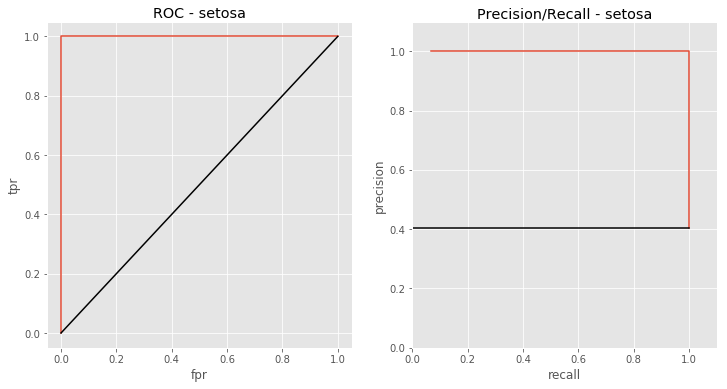

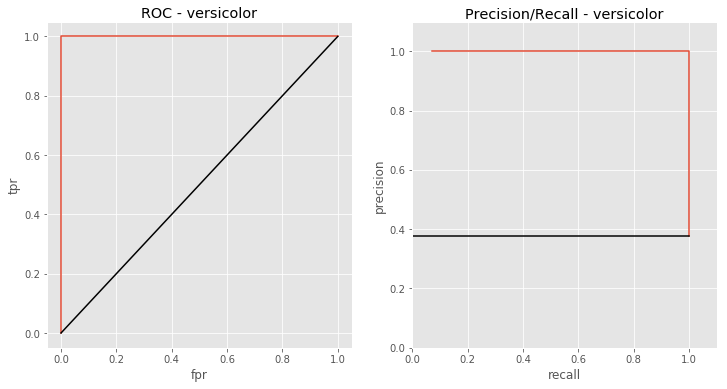

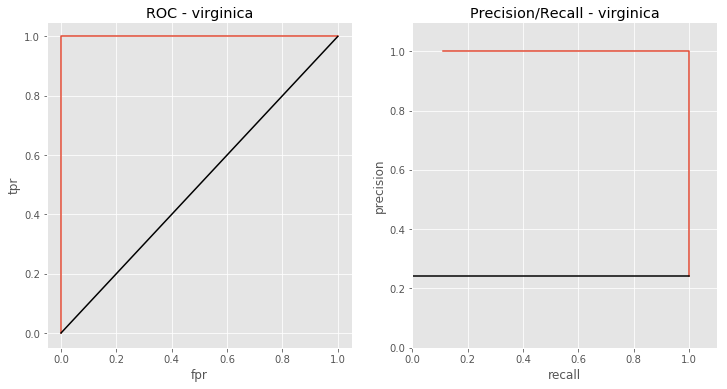

In [19]:
for i in range(num_outputs):
    fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
    df = c.calculate_threshold_values(i)
    c.plot_roc(ax0, df, i)
    c.plot_precision_recall(ax1, df, i)
    
    
#TODO
"""
Add the wikipedia plot but put the mislabeled points in the color black 

For MNIST: Start small, start easy! 
First project
1) Get the MNIST data 
2) Filter out all but the numbers 9 and 2 
3) Build a 2 v 9 classifier (I strongly recommend only keeping a subset of the training data, you don't need more than a few MBs)
3a) Visualize the layers in your net, ideal while it's training 
3b) Investigate something equivalent to the training stats curve 
3c) Invetsigate using tensorboard while your model is training 
4) Once you have a good 2 v 9 classifier build out a 3 way classifier (0 v 4 v 7) (for this one try not to prefilter the data, instead read from the fukll dataset 
5) Do the full 10 digit classifier 

Links:
http://cs.stanford.edu/people/karpathy/convnetjs/

"""

# 9) Scatter Plots including Misclassified data

In [20]:
iris_df =  Dataframe.create_df(iris)
iris_df.head()

TypeError: unbound method create_df() must be called with Dataframe instance as first argument (got Bunch instance instead)

In [21]:
p = Plots(iris_df)
p.create_scatter_matrix('species name', 'species','Iris data')

NameError: name 'iris_df' is not defined

In [22]:
pred_labels

array([0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1,
       2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 0])

In [23]:
y_test

array([0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1,
       2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 0])

In [24]:
    def make_classification_df(y, y_pred, label_name_dict):
        # It is stupid we have to specify dtype to limit number of allowed chars in string.
        # Find a way around this 
        pred_labels = np.empty(len(y_pred), dtype= '|S13')
        misclassified = np.empty(len(y_pred), dtype = bool)
        for numeric_label in label_name_dict:
            pred_labels[np.where(y_pred == numeric_label)] = label_name_dict[numeric_label]
        misclassified[np.where(y != y_pred)] = True
        indicator = pred_labels
        indicator[misclassified] = 'misclassified'
        df = pd.DataFrame({'Actual': y, 'Predicted': y_pred, 'Indicator': indicator})
        return df


In [25]:
df = make_classification_df(y_test, pred_labels, {0: 'setosa', 1: 'versicolor', 2: 'verginica'})

In [26]:
df

,Actual,Indicator,Predicted
0,0,setosa,0
1,1,versicolor,1
2,2,verginica,2
3,1,versicolor,1
4,0,setosa,0
5,0,setosa,0
6,0,setosa,0
7,1,versicolor,1
8,1,versicolor,1
9,0,setosa,0


In [27]:
classification_df = Dataframe.make_classification_df(y_test, pred_labels, {0: 'setosa', 1: 'versicolor', 2: 'verginica'})

TypeError: unbound method make_classification_df() must be called with Dataframe instance as first argument (got ndarray instance instead)

In [28]:
p2 = Plots(classification_df)

NameError: name 'classification_df' is not defined

In [29]:
p2.create_scatter_matrix(class_col_name='Indicator', class_col_name_numeric='Predicted', title= 'Iris Test Predictions')

NameError: name 'p2' is not defined

In [ ]:
X_test

In [33]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [30]:
man_iris = Manipulation(iris)

In [31]:
man_iris.make_label_name_dict()